In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.api import Holt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

In [2]:
series = [2,5,0,2,4,1,2,2,5,7,2,5,2,3,4,3,3,5,8,2,5,3,5,4,6,4,7,3,8,3]
index=pd.date_range('2019-01-18', periods=30, freq='D')
data=pd.DataFrame(series, index=index)
data.columns=['Goals']
#Otamme tarkkailuun Chicago Blackhawks -joukkuueen maalimäärät.

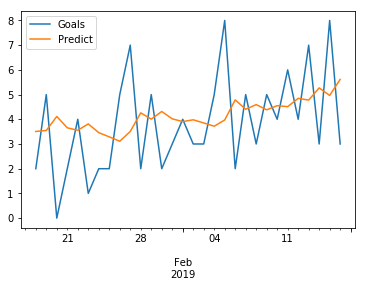

In [4]:
fit1 = Holt(data['Goals']).fit()
data['Predict']=fit1.fittedvalues
data.plot()
#Holtin malli ennustaa suurempaa maalimäärää kuin yksinkertainen ennustusmalli.

In [5]:
sqrt(mean_squared_error(data['Goals'], data['Predict']))
#Keskihajonta on edelleen alhainen ja lähellä edellisen mallin tasoa (1.94)

2.0342736593807964

In [6]:
mean_absolute_error(data['Goals'], data['Predict'])
#MAD = 1.75, joka ei juuri eroa yksinkertaisen ekspotentiaalisen ennustemallin luvusta (1.59)

1.7516883575871494

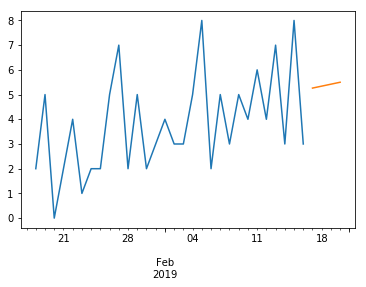

In [9]:
index=pd.date_range('2019-02-16', periods=30, freq='D')
datap=pd.DataFrame(fit1.forecast(4), index=index)
datap.columns=['Predict']
data['Goals'].plot()
datap['Predict'].plot()

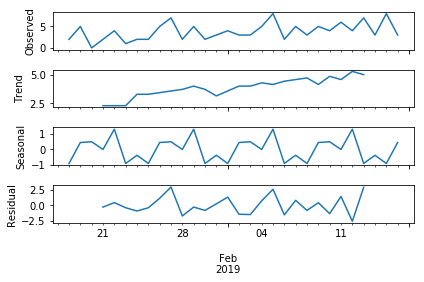

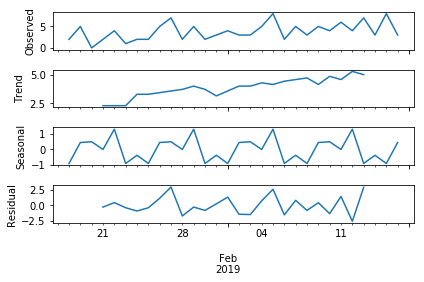

In [10]:
from statsmodels.tsa.api import seasonal_decompose
seasonal_decompose(data['Goals']).plot()
#Trendi on selvästi kasvava..
#Maalimäärä on siis selvästi nousussa.

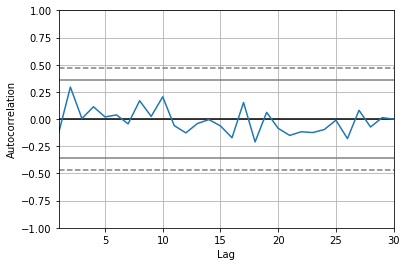

In [11]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(data['Goals'])
#Kuviosta näemme, ettei kausivaihtelu ylitä koskaan merkittävän korrelaation rajaa.